Example notebook to recreate Fig. 13 (comparison of absolute magnitudes between our calibrated TFR and Cosmicflows-4's calibrated TFR) for the DR1 paper.

In [1]:
import numpy as np

from astropy.io import fits

import matplotlib.pyplot as plt

# Data

In [2]:
hdul = fits.open('fig13_data.fits')

hdr = hdul[0].header
gals = hdul[1].data

hdul.close()

In [3]:
dwarf_boolean = ~gals['MAIN']

# Plot

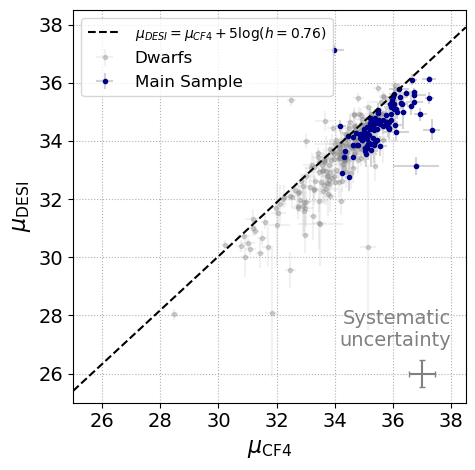

In [4]:
H0 = 76.0 
h = H0/100

plt.figure(tight_layout=True)

plt.grid(ls=':')

plt.plot([25, 38.5], np.array([26, 38.5]) + 5*np.log10(h), 'k--', zorder=4, label=r'$\mu_{DESI} = \mu_{CF4} +5\log(h=0.76)$') # with H0 from Cosmicflows 4

plt.errorbar(x=gals['DM_R_CF4'][dwarf_boolean], y=gals['DM_R_DESI'][dwarf_boolean],
             xerr=np.sqrt(gals['DM_R_CF4_ERR'][dwarf_boolean]**2 - hdr['SIG_CF4']**2), 
             yerr=np.sqrt(gals['DM_R_DESI_ERR'][dwarf_boolean]**2 - hdr['SIG_DESI']**2), 
             fmt='.', 
             alpha=0.3, 
             color='gray',
             ecolor='lightgray',
             label='Dwarfs')

plt.errorbar(x=gals['DM_R_CF4'][~dwarf_boolean], y=gals['DM_R_DESI'][~dwarf_boolean],
             xerr=np.sqrt(gals['DM_R_CF4_ERR'][~dwarf_boolean]**2 - hdr['SIG_CF4']**2), 
             yerr=np.sqrt(gals['DM_R_DESI_ERR'][~dwarf_boolean]**2 - hdr['SIG_DESI']**2), 
             fmt='.', 
             color='darkblue',
             ecolor='lightgray',
             label='Main Sample')

# Systematic error bar
plt.errorbar([37], [26], 
             xerr=hdr['SIG_CF4'],
             yerr=hdr['SIG_DESI'], 
             ecolor='gray', 
             capsize=2)
plt.annotate('Systematic\nuncertainty', 
             (38, 27.5), 
             va='center',
             ha='right',
             c='gray',
             fontsize=14)

plt.gca().set_aspect('equal')

plt.xlim([25, 38.5])
plt.ylim([25, 38.5])

plt.ylabel(r'$\mu_{\text{DESI}}$', fontsize=16)
plt.xlabel(r'$\mu_{\text{CF4}}$', fontsize=16);
plt.legend(fontsize=12).get_texts()[0].set_fontsize(10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()